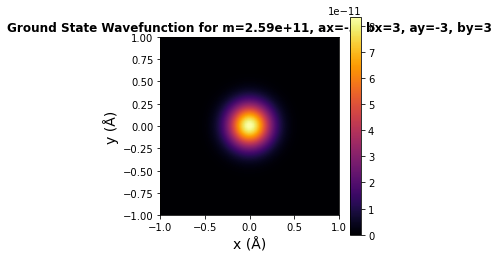

Ground State Energy = 6.96751 KJ/mol


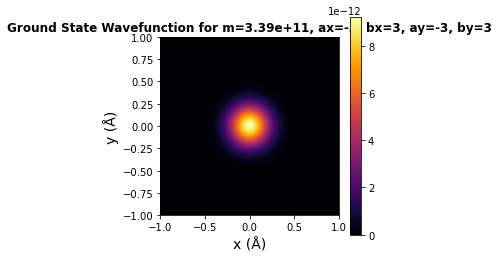

Ground State Energy = 6.84638 KJ/mol


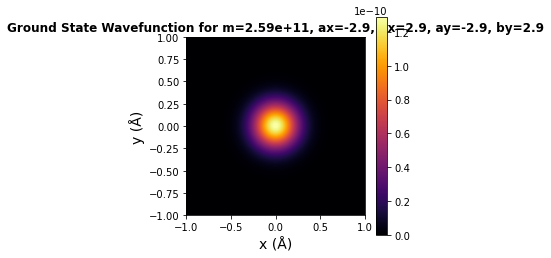

Ground State Energy = 6.98795 KJ/mol


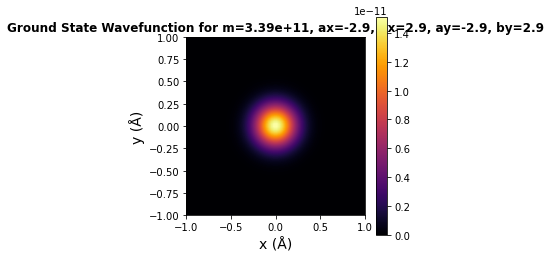

Ground State Energy = 6.86453 KJ/mol


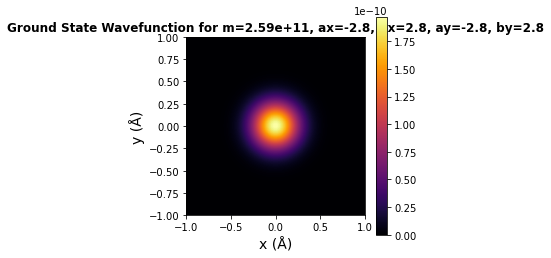

Ground State Energy = 7.01021 KJ/mol


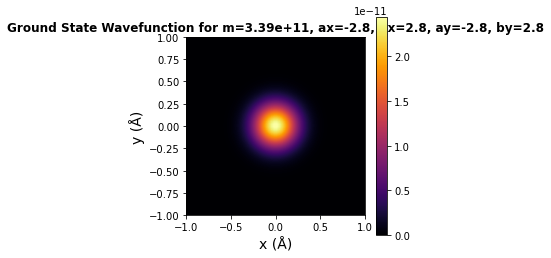

Ground State Energy = 6.88420 KJ/mol


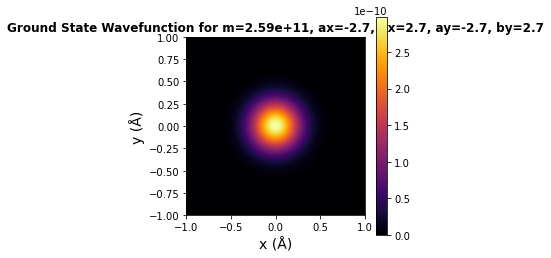

Ground State Energy = 7.03459 KJ/mol


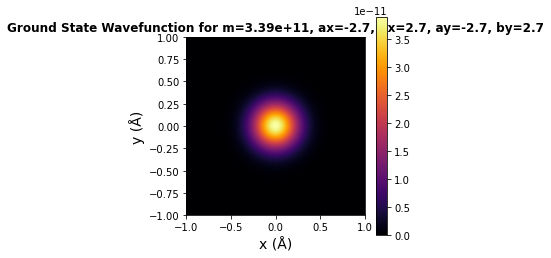

Ground State Energy = 6.90560 KJ/mol


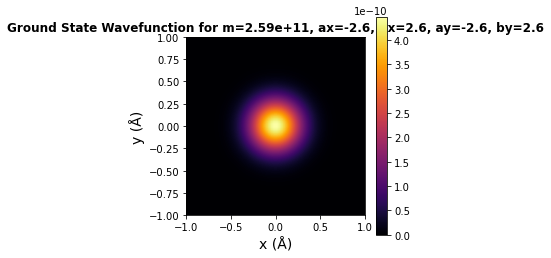

Ground State Energy = 7.06152 KJ/mol


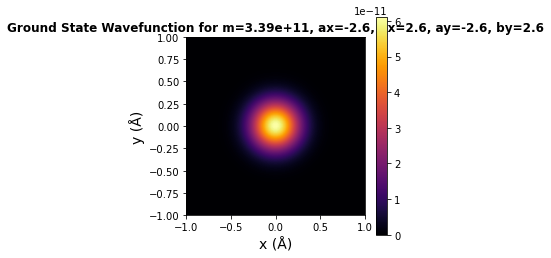

Ground State Energy = 6.92908 KJ/mol


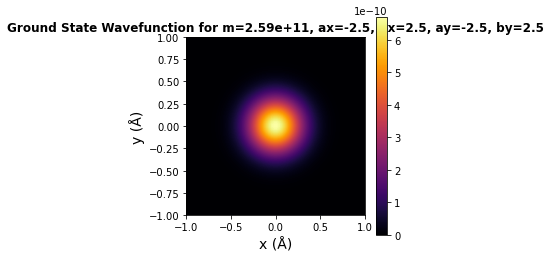

Ground State Energy = 7.09164 KJ/mol


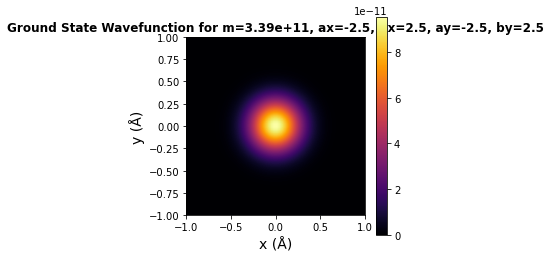

Ground State Energy = 6.95519 KJ/mol


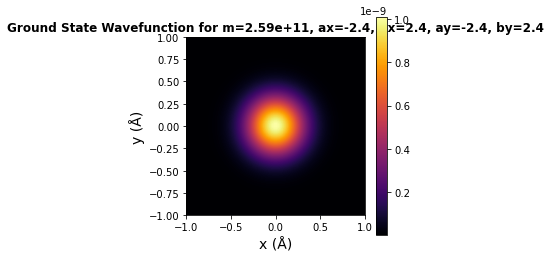

Ground State Energy = 7.12573 KJ/mol


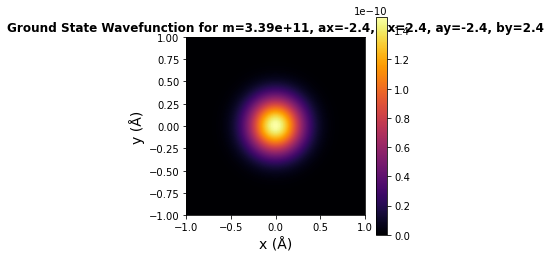

Ground State Energy = 6.98466 KJ/mol


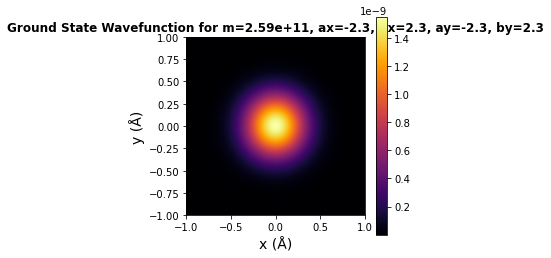

Ground State Energy = 7.16468 KJ/mol


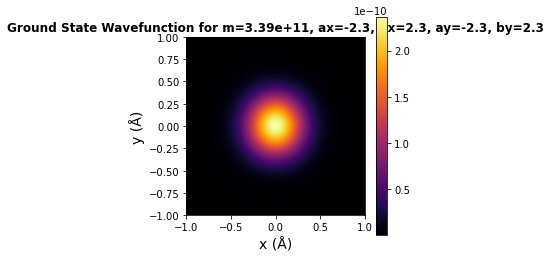

Ground State Energy = 7.01835 KJ/mol


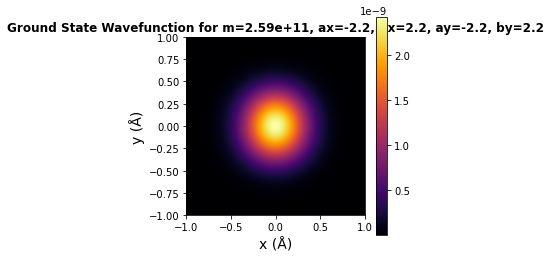

Ground State Energy = 7.20939 KJ/mol


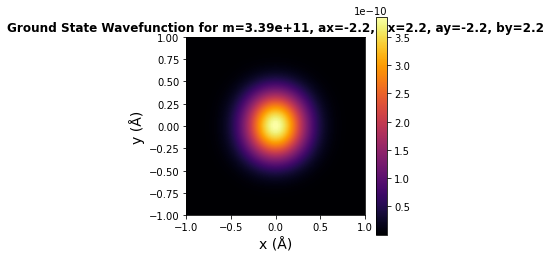

Ground State Energy = 7.05715 KJ/mol


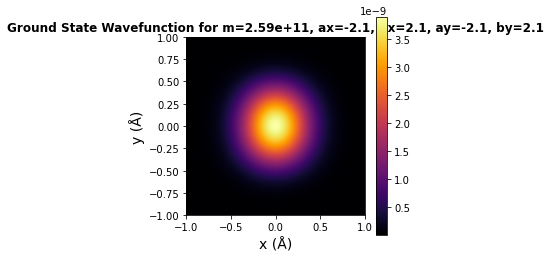

Ground State Energy = 7.26080 KJ/mol


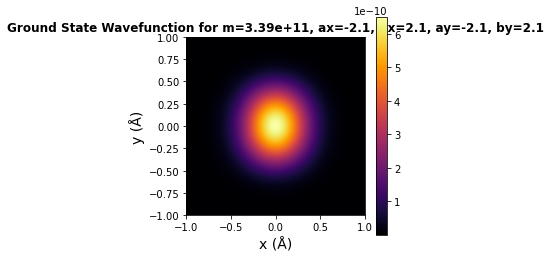

Ground State Energy = 7.10193 KJ/mol


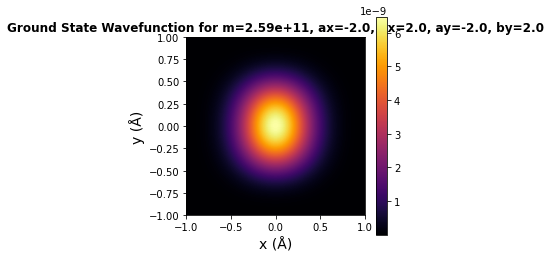

Ground State Energy = 7.31981 KJ/mol


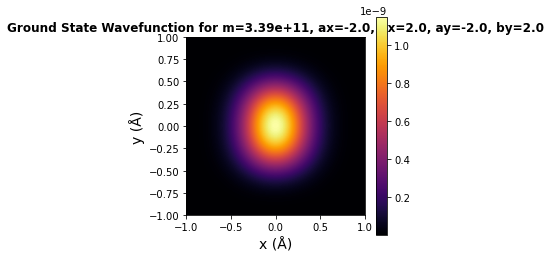

Ground State Energy = 7.15358 KJ/mol


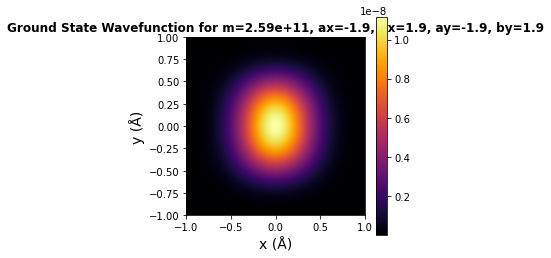

Ground State Energy = 7.38735 KJ/mol


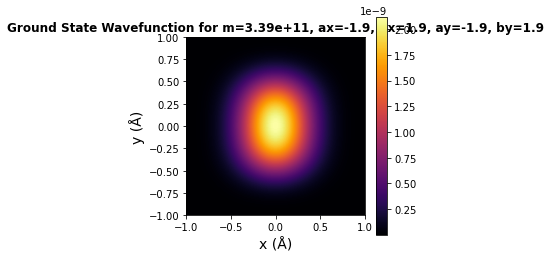

Ground State Energy = 7.21300 KJ/mol


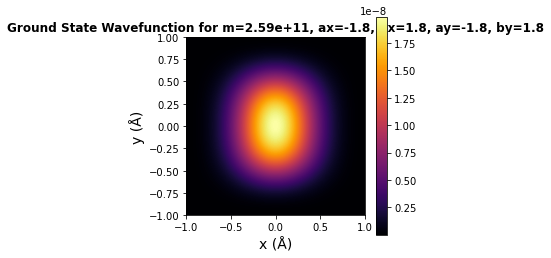

Ground State Energy = 7.46426 KJ/mol


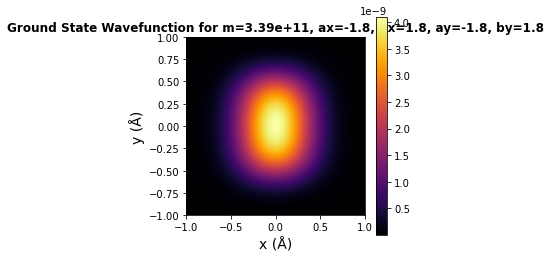

Ground State Energy = 7.28097 KJ/mol


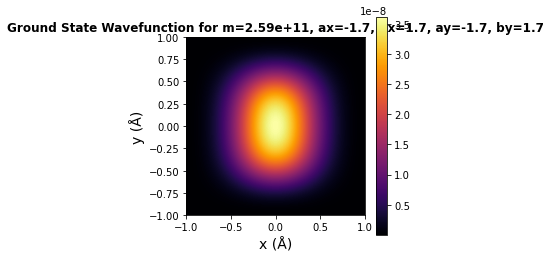

Ground State Energy = 7.55133 KJ/mol


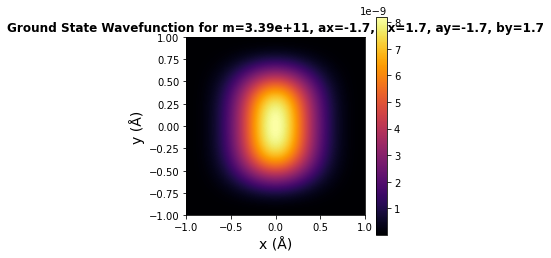

Ground State Energy = 7.35819 KJ/mol


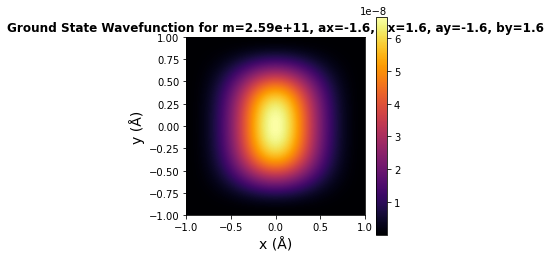

Ground State Energy = 7.64958 KJ/mol


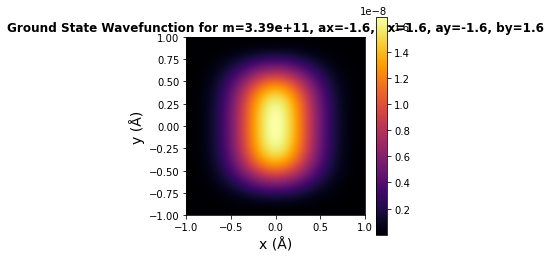

Ground State Energy = 7.44546 KJ/mol


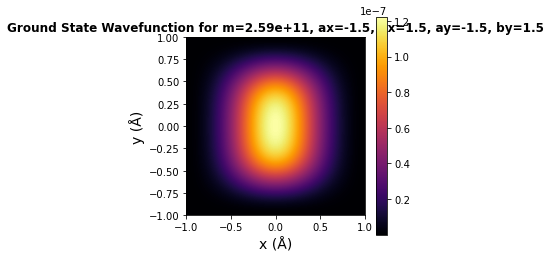

Ground State Energy = 7.76048 KJ/mol


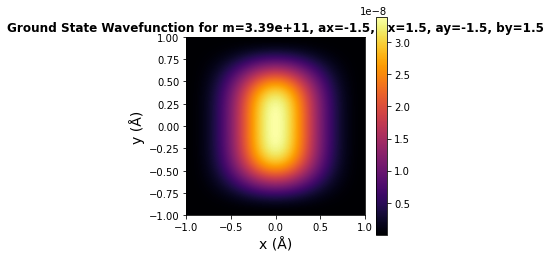

Ground State Energy = 7.54405 KJ/mol


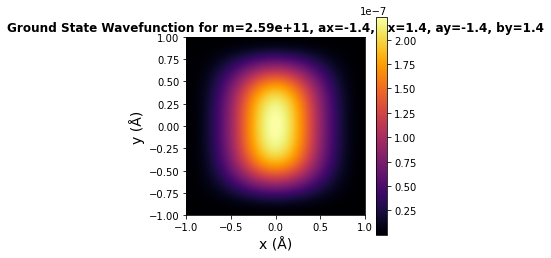

Ground State Energy = 7.88612 KJ/mol


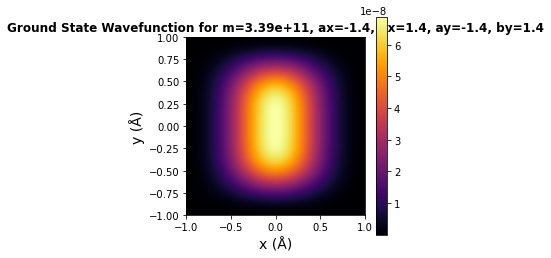

Ground State Energy = 7.65584 KJ/mol


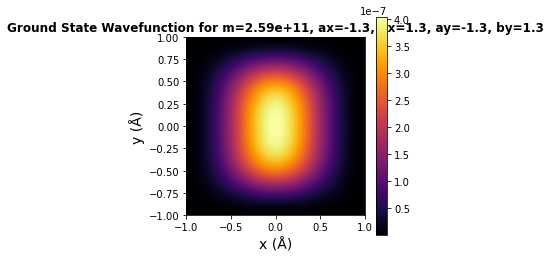

Ground State Energy = 8.02938 KJ/mol


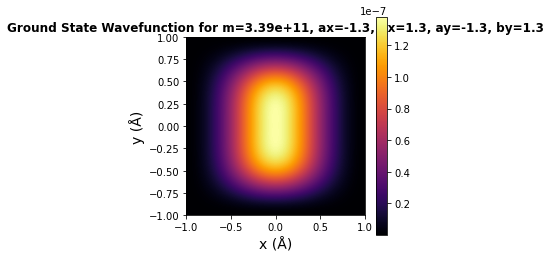

Ground State Energy = 7.78342 KJ/mol


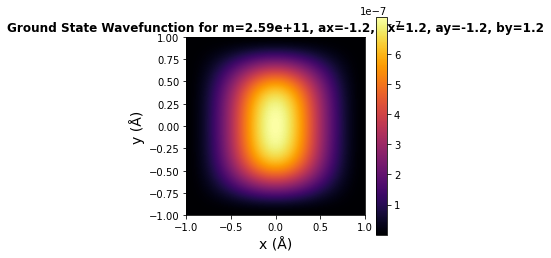

Ground State Energy = 8.19412 KJ/mol


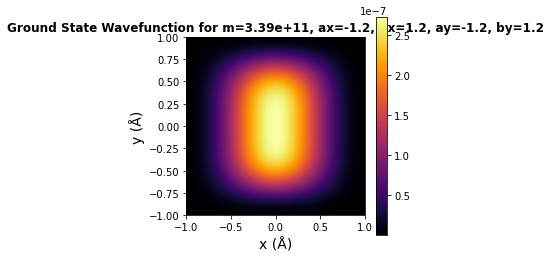

Ground State Energy = 7.93029 KJ/mol


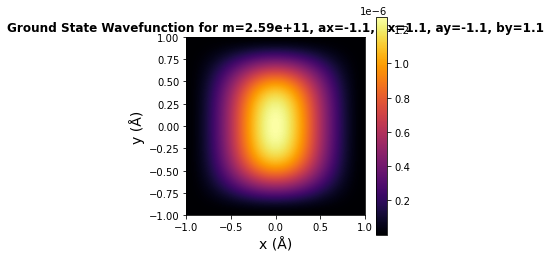

Ground State Energy = 8.38555 KJ/mol


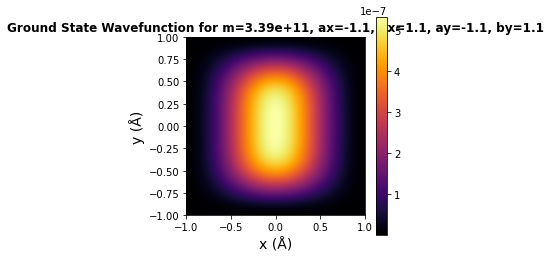

Ground State Energy = 8.10120 KJ/mol


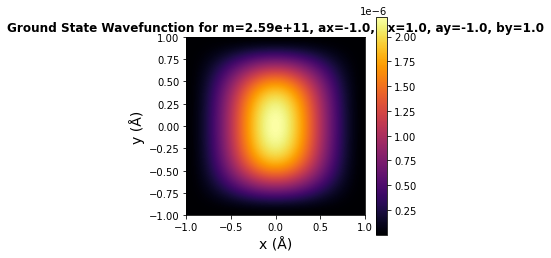

Ground State Energy = 8.61077 KJ/mol


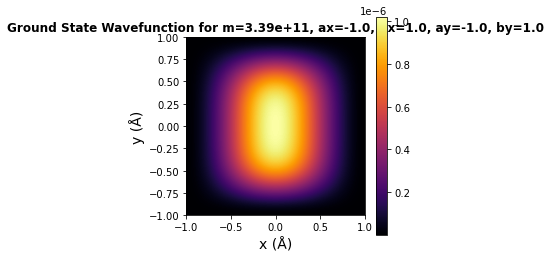

Ground State Energy = 8.30267 KJ/mol


In [1]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# Constants
az = 1.5
bz = 7.15
Nz = 65 #you can go up 65 and maybe a bit more
N = 65 #you can go up 65 and maybe a bit more
h_bar = 1.9e5  # in KJ.A.mol-1.c-2
De_cuphe = 8.20  # in Kj/mol   # Dissociation energy
alpha_cuphe = 2.12  # in 1/(Angstrom)  # Variable related to the curvature of the curve  
ze_cuphe = 2.02  # in (Angstrom)       # Minimum distance 
De_benzhe = 1.51  # in Kj/mol   # Dissociation energy
alpha_benzhe = 1.61  # in 1/(Angstrom)  # Variable related to the curvature of the curve  
ze_benzhe = 3.04  # in (Angstrom)       # Minimum distance 
m_3He = 2.59e11  # in kj.mol-1.c^-2 For 3He
m_4He = 3.39e11  # in kj.mol-1.c^-2 For 4He

# Define the potential functions
def Anharm_potential(z_Morse, De, alpha):
    return De * (1 - np.exp(-alpha * z_Morse)) ** 2

def compute_potential(distance, N, De, alpha, ze):
    distance_conf = abs(distance) - ze
    V1 = Anharm_potential(distance_conf, De, alpha)
    V_conf = 2 * V1
    V_conf_reshape = sparse.diags(V_conf.reshape((N + 1) ** 3), (0)) 
    return V_conf, V_conf_reshape

# Define the cases
cases = [
    {'ax': -3, 'bx': 3, 'ay': -3, 'by': 3},
    {'ax': -2.9, 'bx': 2.9, 'ay': -2.9, 'by': 2.9},
    {'ax': -2.8, 'bx': 2.8, 'ay': -2.8, 'by': 2.8},
    {'ax': -2.7, 'bx': 2.7, 'ay': -2.7, 'by': 2.7},
    {'ax': -2.6, 'bx': 2.6, 'ay': -2.6, 'by': 2.6},
    {'ax': -2.5, 'bx': 2.5, 'ay': -2.5, 'by': 2.5},
    {'ax': -2.4, 'bx': 2.4, 'ay': -2.4, 'by': 2.4},
    {'ax': -2.3, 'bx': 2.3, 'ay': -2.3, 'by': 2.3},
    {'ax': -2.2, 'bx': 2.2, 'ay': -2.2, 'by': 2.2},
    {'ax': -2.1, 'bx': 2.1, 'ay': -2.1, 'by': 2.1},
    {'ax': -2.0, 'bx': 2.0, 'ay': -2.0, 'by': 2.0},
    {'ax': -1.9, 'bx': 1.9, 'ay': -1.9, 'by': 1.9},
    {'ax': -1.8, 'bx': 1.8, 'ay': -1.8, 'by': 1.8},
    {'ax': -1.7, 'bx': 1.7, 'ay': -1.7, 'by': 1.7},
    {'ax': -1.6, 'bx': 1.6, 'ay': -1.6, 'by': 1.6},
    {'ax': -1.5, 'bx': 1.5, 'ay': -1.5, 'by': 1.5},
    {'ax': -1.4, 'bx': 1.4, 'ay': -1.4, 'by': 1.4},
    {'ax': -1.3, 'bx': 1.3, 'ay': -1.3, 'by': 1.3},
    {'ax': -1.2, 'bx': 1.2, 'ay': -1.2, 'by': 1.2},
    {'ax': -1.1, 'bx': 1.1, 'ay': -1.1, 'by': 1.1},
    {'ax': -1.0, 'bx': 1.0, 'ay': -1.0, 'by': 1.0}
    #{'ax': -0.95, 'bx': 0.95, 'ay': -0.95, 'by': 0.95},
    #{'ax': -0.90, 'bx': 0.90, 'ay': -0.90, 'by': 0.90},
    #{'ax': -0.85, 'bx': 0.85, 'ay': -0.85, 'by': 0.85},
    #{'ax': -0.8, 'bx': 0.8, 'ay': -0.8, 'by': 0.8},
    #{'ax': -0.75, 'bx': 0.75, 'ay': -0.75, 'by': 0.75},
    #{'ax': -0.7, 'bx': 0.7, 'ay': -0.7, 'by': 0.7},
    #{'ax': -0.65, 'bx': 0.65, 'ay': -0.65, 'by': 0.65},
    #{'ax': -0.6, 'bx': 0.6, 'ay': -0.6, 'by': 0.6},
    #{'ax': -0.55, 'bx': 0.55, 'ay': -0.55, 'by': 0.55},
    #{'ax': -0.5, 'bx': 0.5, 'ay': -0.5, 'by': 0.5}
]

# Loop over the cases
for case in cases:
    ax = case['ax']
    ay = case['ay']
    bx = case['bx']
    by = case['by']

    # Generate grid
    x = np.linspace(ax, bx, N + 1, dtype=float)
    y = np.linspace(ay, by, N + 1, dtype=float)
    z = np.linspace(az, bz, Nz + 1, dtype=float)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    X, Y, Z = np.meshgrid(x, y, z)

    # Construct the sparse matrices
    diag_1 = np.ones([N + 1])
    diag_2 = np.array([diag_1, -2 * diag_1, diag_1])
    B = sparse.spdiags(diag_2, np.array([-1, 0, 1]), N + 1, N + 1)
    BB = (1 / (dx ** 2)) * B
    CC = (1 / (dy ** 2)) * B
    DD = (1 / (dz ** 2)) * B
    C = sparse.kronsum(BB, CC)
    D = sparse.kronsum(C, DD)

    # Loop over the two masses
    for m in [m_3He, m_4He]:
        # Kinetic energy
        T = (-(h_bar ** 2) / (2 * m)) * D

        # Potential energy (Cu+-He)
        distance = np.sqrt(X ** 2 + Y ** 2 + Z ** 2)
        z_Morse = (distance - ze_cuphe)
        V_cuphe = Anharm_potential(z_Morse, De_cuphe, alpha_cuphe)
        V_cuphe_sparse = sparse.diags(V_cuphe.reshape((N + 1) ** 3), (0))

        # Potential energy (Benzene-He)
        V_benzhe, V_benzhe_reshape = compute_potential(distance, N, De_benzhe, alpha_benzhe, ze_benzhe)

        # Total potential energy
        V_total = sparse.diags((V_cuphe + V_benzhe).reshape((N + 1) ** 3), (0))

        # Hamiltonian
        H = T + V_total

        # Eigenvalue and eigenvector computation
        eigenvalues, eigenvectors = eigsh(H, 1, which='SM', tol=1.e-15, ncv=15)

        # Ground state wavefunction
        def result(n): 
            return eigenvectors.T[n].reshape((N + 1, N + 1, N + 1))

        def resultt(n): 
            return eigenvectors[:,  n].reshape((N + 1, N + 1, N + 1))

        probability = (result(0) * resultt(0))

        # Plotting
        borders = (-1, 1)
        extent = borders[0], borders[1], borders[0], borders[1]

        plt.figure(figsize=(4, 4))
        plt.imshow(probability[:, :, round(N / 2)], cmap=plt.cm.inferno, interpolation='bilinear', extent=extent)
        plt.colorbar()
        plt.title(f'Ground State Wavefunction for m={m:.2e}, ax={ax}, bx={bx}, ay={ay}, by={by}', fontweight='bold')
        plt.xlabel('x (Å)', fontsize=14)
        plt.ylabel('y (Å)', fontsize=14)
        plt.show()
        
        # Print ground state energy
        print(f'Ground State Energy = {eigenvalues[0]:.5f} KJ/mol')


In [ ]:
dz